In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Importing the dataset and reading it into a dataframe, excluding the date and classes as they are irrelevant for this prediction.

file_path = r'C:\Users\mdmme\Algerian_forest_fires_cleaned.csv'

# Read the CSV file into a dataframe
df = pd.read_csv(file_path)

# Drop columns 'day', 'month', 'year', and 'Classes' as they are not needed for the prediction
df.drop(columns=['day', 'month', 'year', 'Classes'], inplace=True)

# Display the first few rows of the dataframe
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [43]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [44]:
# Check for null values in the DataFrame
nullValue = df.isnull().sum()

# Print the total number of missing values for each column
print("\nTotal number of null values:\n",nullValue)


Total number of null values:
 Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64


In [45]:
#Checking for duplicate values in the DataFrame

duplicateValue = df.duplicated().sum()

# Print the total number of duplicate values for each column
print("\nTotal number of duplicate values:\n",duplicateValue)


Total number of duplicate values:
 0


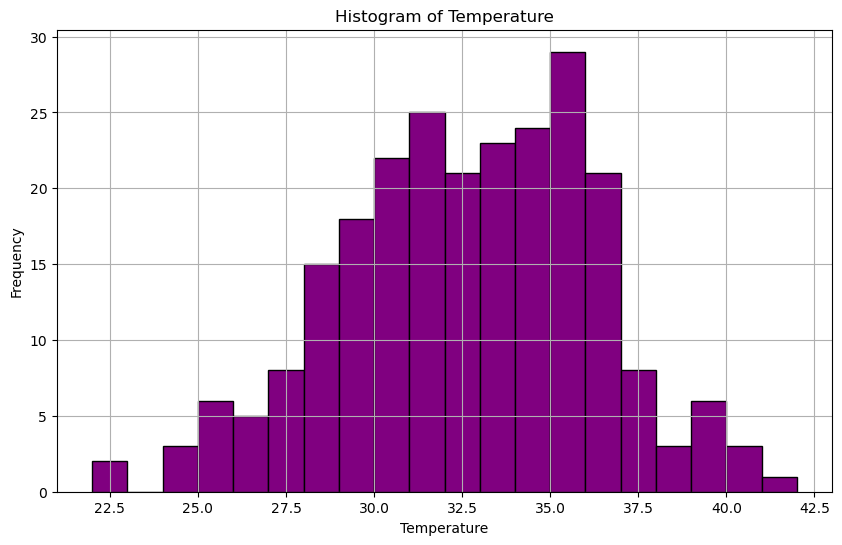

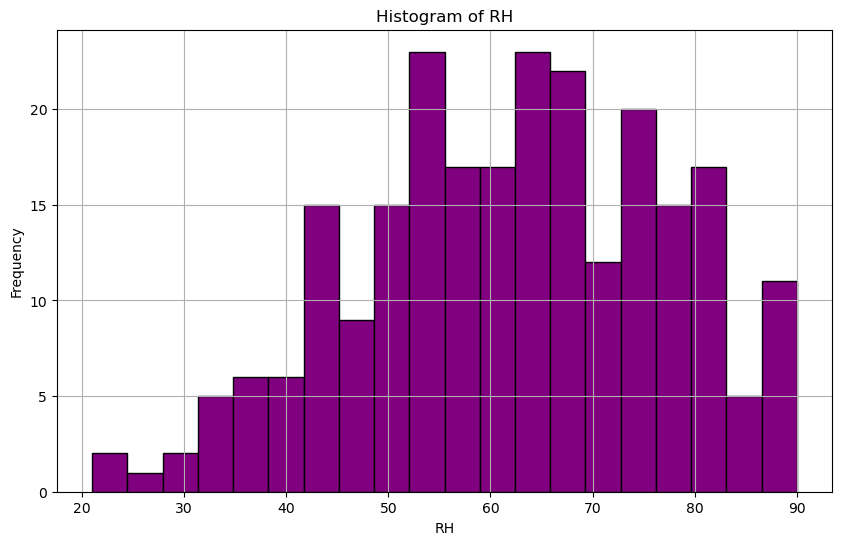

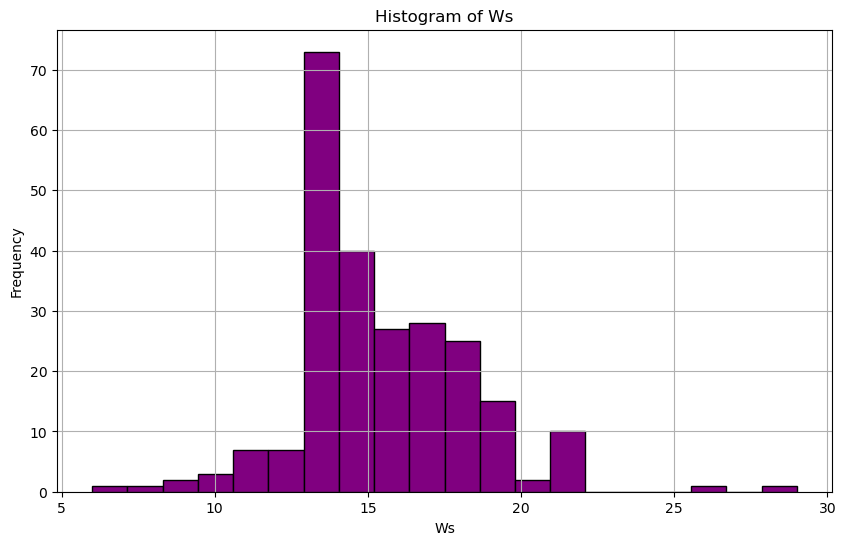

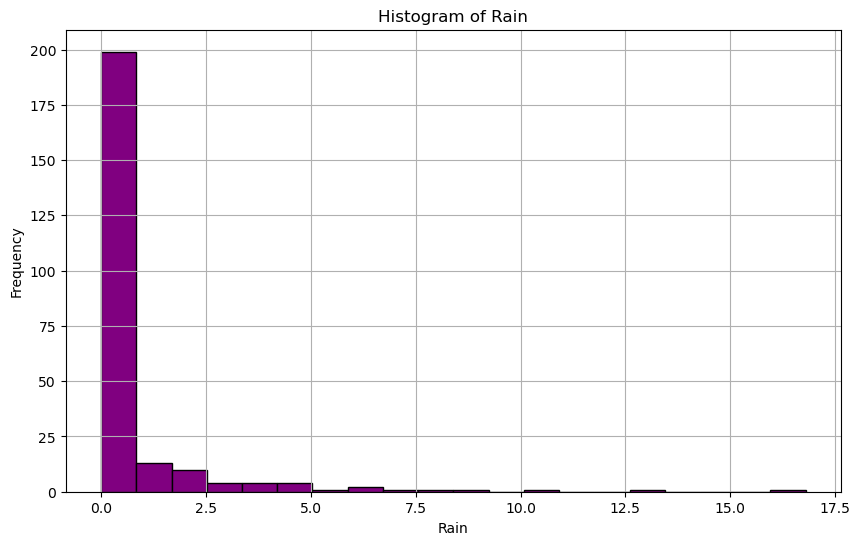

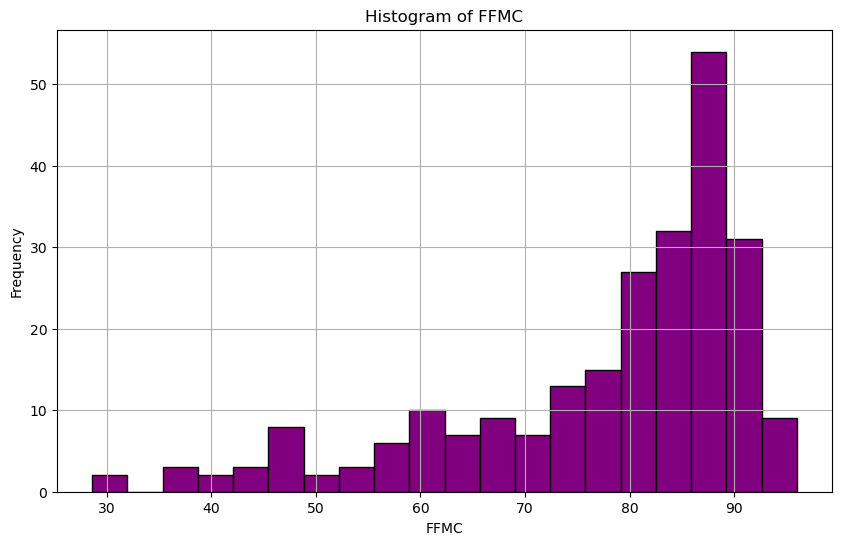

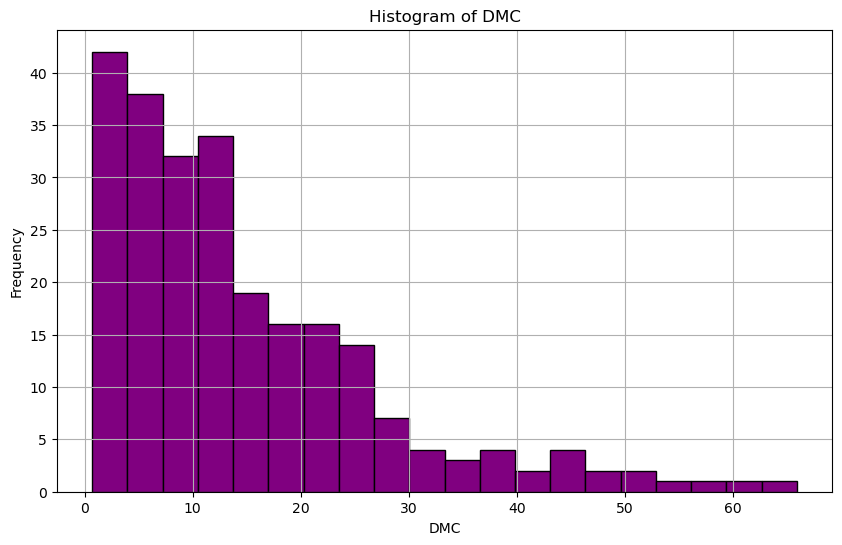

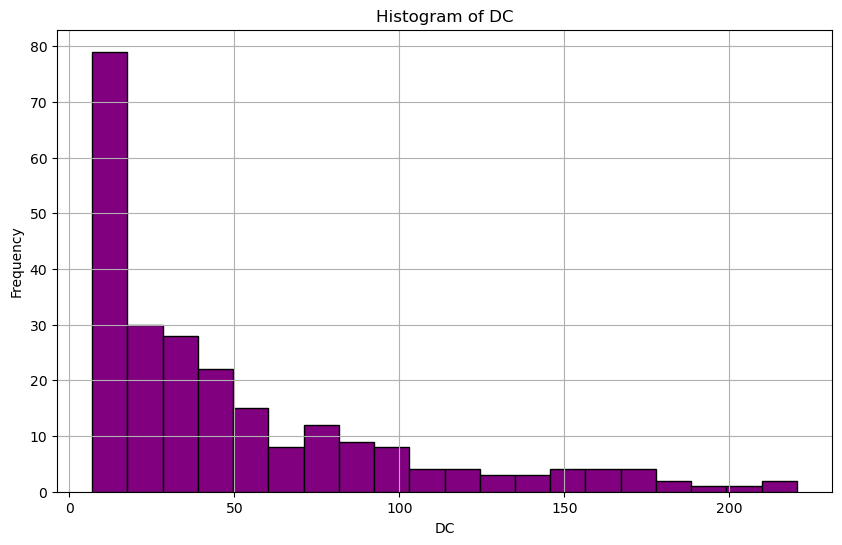

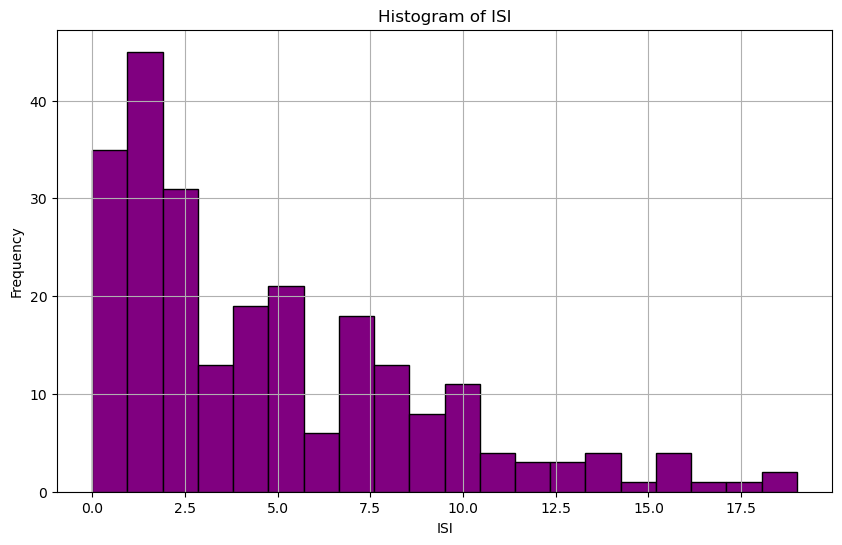

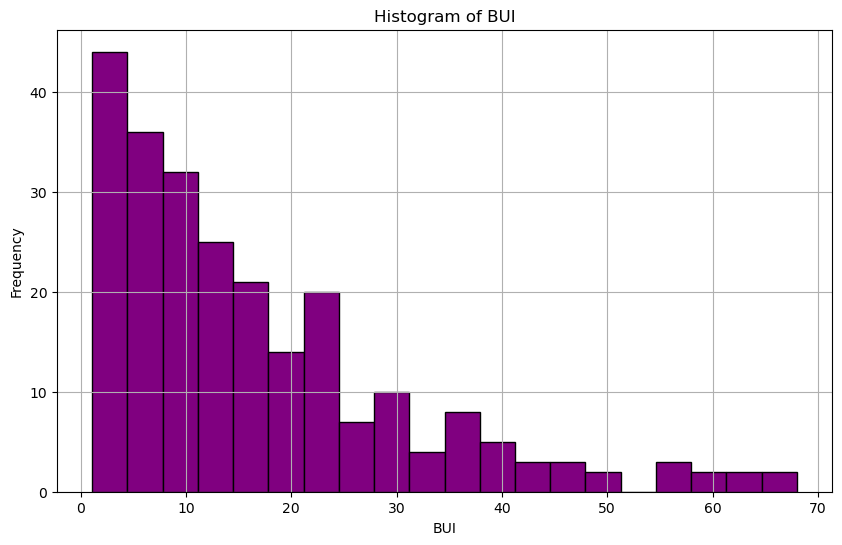

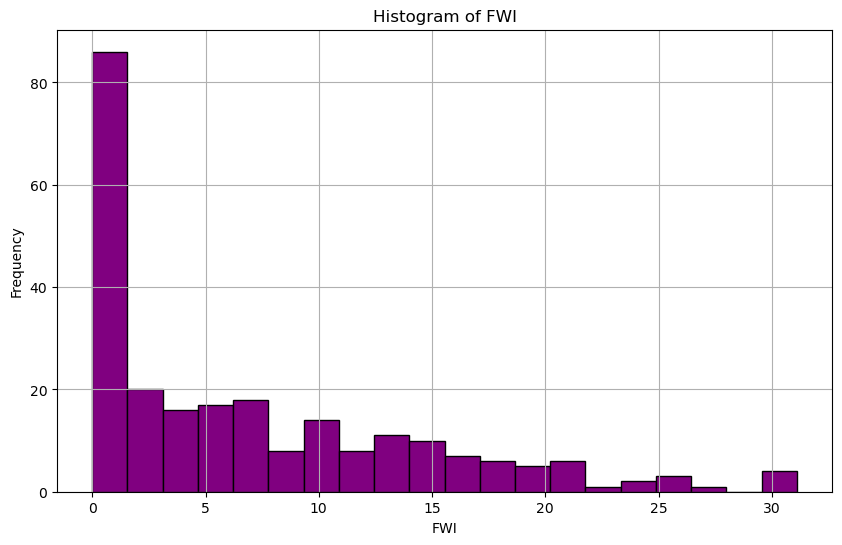

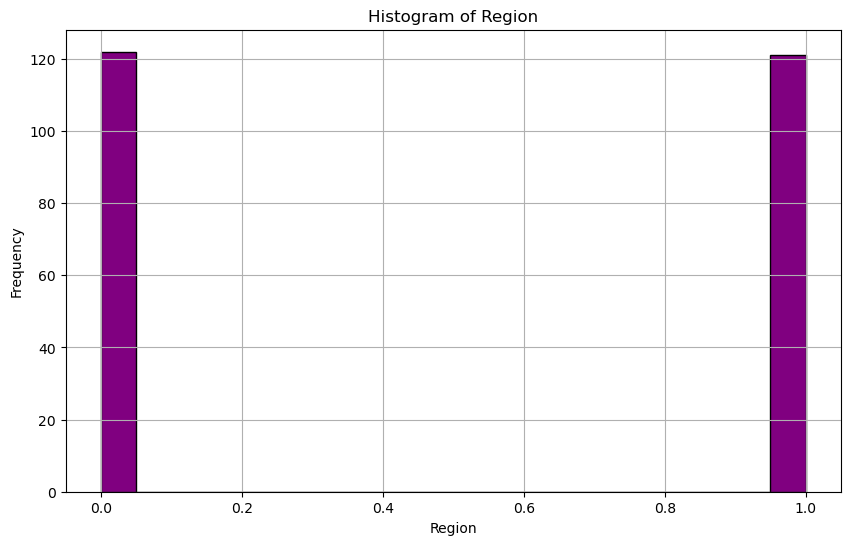

In [46]:
# Visualizing histograms for numerical columns in the DataFrame
for column in df.select_dtypes(include=['number']).columns:
    # Set the size of the figure
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram with specified color, bins, and edgecolor
    plt.hist(df[column], color='purple', bins=20, edgecolor='black')
    
    # Set the title of the histogram
    plt.title('Histogram of {}'.format(column))
    
    # Set labels for x and y axes
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Display grid lines for better readability
    plt.grid(True)
    
    # Show the histogram plot
    plt.show()

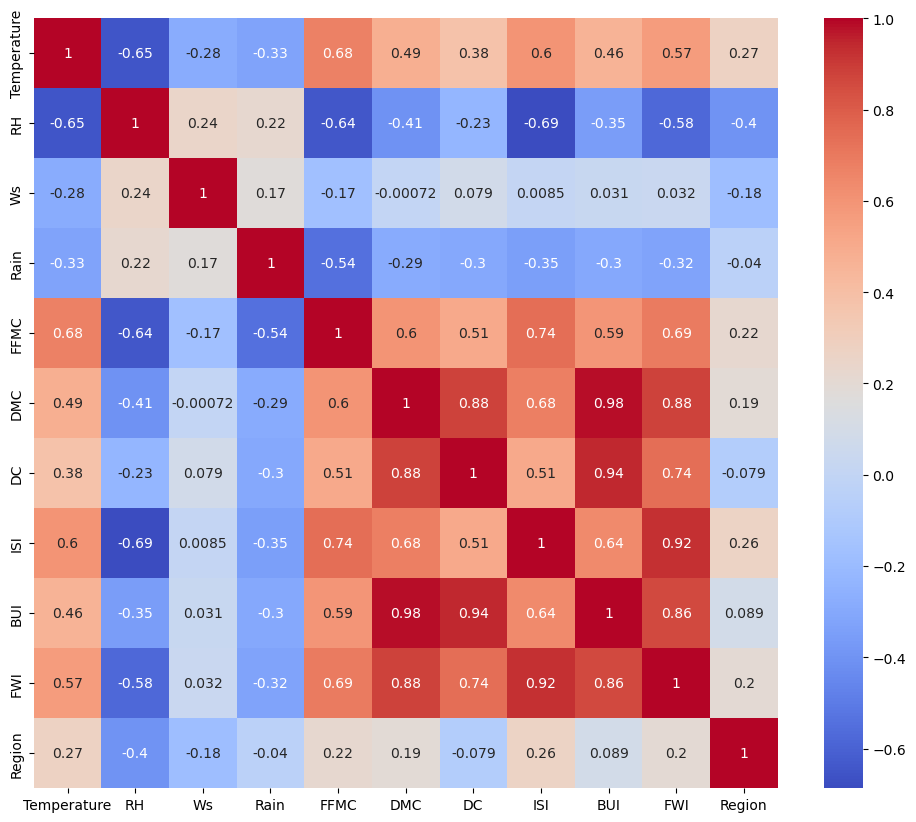

In [47]:
# Visualizing the correlation matrix between all features
plt.figure(figsize=(12, 10))

# Generate a heatmap of the correlation matrix with coolwarm color map and annotations
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

# Display the correlation heatmap
plt.show()

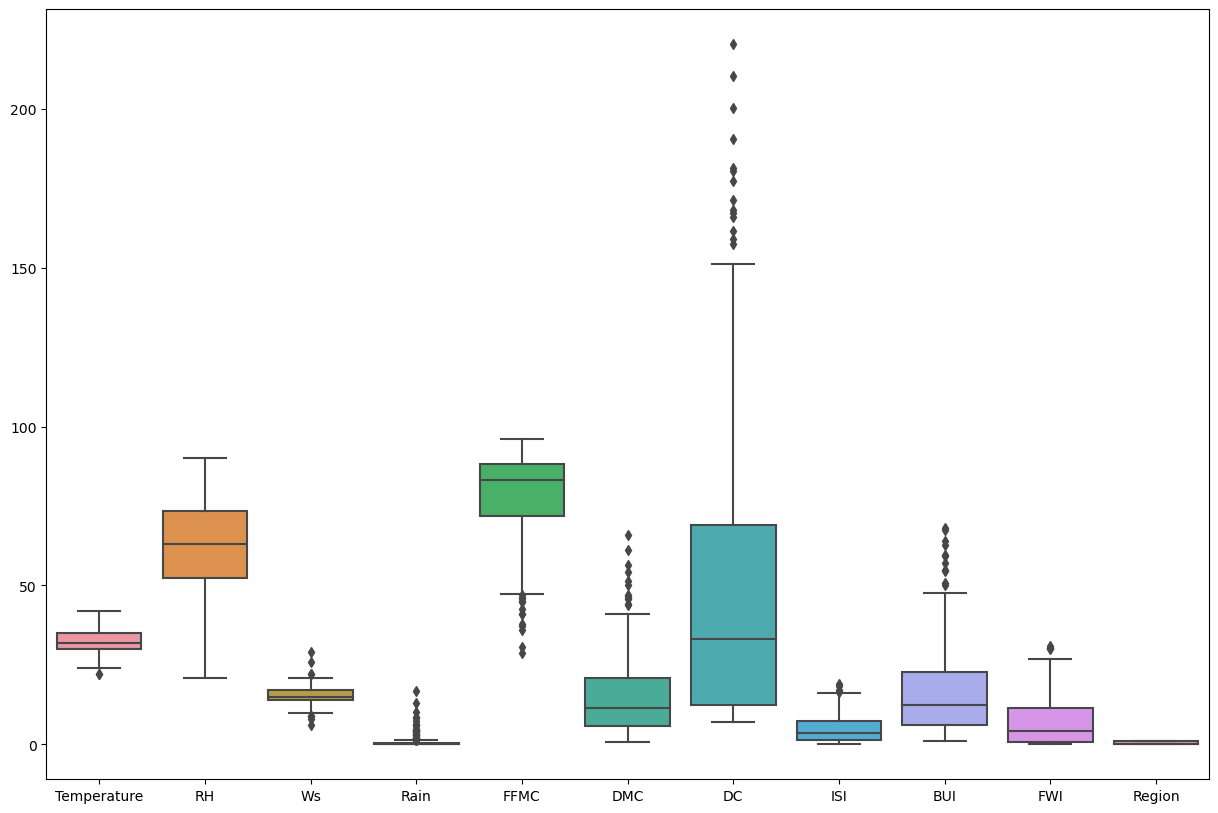

In [48]:
# Visualizing boxplots for each column in the DataFrame
plt.figure(figsize=(15, 10))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

# Display the boxplot
plt.show()

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [50]:
# Keeping aside 5 data for later evaluation
data = df.sample(5, random_state=10)

# Removing the data from the dataset
df = df.drop(data.index)

# Taking the 3 features for our prediction in a dataframe and our dependent variable
a = df[['Temperature', 'RH', 'Ws']]
b = df['FWI']

In [51]:
# Splitting the data into training (80%) and testing (20%) sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=18)

In [52]:
# Standardizing the data
stc = StandardScaler()

# Fit and transform the training data
a_train_stc = stc.fit_transform(a_train)

# Transform the testing data using the same scaler
a_test_stc = stc.transform(a_test)

In [53]:
print("Shape of a_train:", a_train_stc.shape)
print("Shape of a_test:", a_test_stc.shape)
print("Shape of b_train:", b_train.shape)
print("Shape of b_test:", b_test.shape)

Shape of a_train: (190, 3)
Shape of a_test: (48, 3)
Shape of b_train: (190,)
Shape of b_test: (48,)


In [54]:
# Creating a linear regression model
lr = LinearRegression()

# Fitting the model using the standardized training data
lr.fit (a_train_stc, b_train)

LinearRegression()

In [55]:
# Coefficients and intercept of the trained linear regression model

lr.coef_, lr.intercept_

(array([ 2.80634557, -2.66731587,  1.76073108]), 6.853684210526314)

In [56]:
# Predicting the target variable on the standardized test data

b_test_pred = lr.predict(a_test_stc)

In [57]:
# Evaluate the performance metrics for the Linear Regression model
print("Metrics for LR model: ")

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(b_test, b_test_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(b_test, b_test_pred)

# Calculate R-squared (R2) score
R2 = r2_score(b_test, b_test_pred)

# Display the metrics
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Metrics for LR model: 
MAE: 4.964176975092585
MSE: 38.8491022389444
R2: 0.4653936002728336


In [58]:
# Defining the hyperparameter grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Creating a Ridge regression model
ridge_model = Ridge()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(a_train_stc, b_train) 

# Retrieving the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for training: ", best_alpha)

Best alpha for training:  10


In [59]:
# Fit the Ridge model with the best hyperparameters to the scaled training data
ridge_tuned_model = Ridge(alpha=best_alpha)
ridge_tuned_model.fit(a_train_stc, b_train)

# Predicting using the tuned model
ridge_pred = ridge_tuned_model.predict(a_test_stc)

# Evaluate the performance metrics for the Tuned Ridge model
print("Metrics for Ridge Tuned model: ")

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(b_test, ridge_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(b_test, ridge_pred)

# Calculate R-squared (R2) score
R2 = r2_score(b_test, ridge_pred)

# Display the metrics
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Metrics for Ridge Tuned model: 
MAE: 4.984256303095556
MSE: 39.23676526214748
R2: 0.46005893045556834


In [60]:
# Defining the hyperparameter grid for Lasso regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Creating a Lasso regression model
lasso_model = Lasso()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(a_train_stc, b_train)

# Retrieving the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for training: ", best_alpha)

Best alpha for training:  0.1


In [61]:
# Fit the Lasso model with the best hyperparameters to the scaled training data
lasso_tuned_model = Lasso(alpha=best_alpha)
lasso_tuned_model.fit(a_train_stc, b_train)

# Predict using the tuned model
lasso_pred = lasso_tuned_model.predict(a_test_stc)

# Evaluate the performance metrics for the Lasso Tuned model
print("Metrics for Lasso Tuned model: ")

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(b_test, lasso_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(b_test, lasso_pred)

# Calculate R-squared (R2) score
R2 = r2_score(b_test, lasso_pred)

# Display the metrics
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Metrics for Lasso Tuned model: 
MAE: 4.975635470394815
MSE: 39.1451246742316
R2: 0.46132000579453647


In [62]:
# Defining the hyperparameter grid for ElasticNet regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Creating an ElasticNet regression model
elastic_model = ElasticNet()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(elastic_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(a_train_stc, b_train)

# Retrieving the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for training: ", best_alpha)

Best alpha for training:  0.1


In [63]:
# Fit the ElasticNet model with the best hyperparameters to the scaled training data
elastic_tuned_model = ElasticNet(alpha=best_alpha)
elastic_tuned_model.fit(a_train_stc, b_train)

# Predict using the tuned model
elastic_pred = elastic_tuned_model.predict(a_test_stc)

# Evaluate the performance metrics for the ElasticNet Tuned model
print("Metrics for ElasticNet Tuned model: ")

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(b_test, elastic_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(b_test, elastic_pred)

# Calculate R-squared (R2) score
R2 = r2_score(b_test, elastic_pred)

# Display the metrics
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Metrics for ElasticNet Tuned model: 
MAE: 4.989325740634556
MSE: 39.389030740330135
R2: 0.4579635899096455


In [66]:
# Define the hyperparameter grid for ElasticNet regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an ElasticNet regression model
elastic_model = ElasticNet()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(elastic_model, param_grid, cv=50, scoring='neg_mean_squared_error')
grid_search.fit(a_train_stc, b_train)

# Retrieve the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for training: ", best_alpha)

Best alpha for training:  0.01


In [67]:
# Fit the ElasticNet model with the best hyperparameters to the scaled training data
elastic_new_model = ElasticNet(alpha=best_alpha)
elastic_new_model.fit(a_train_stc, b_train)

# Predict using the tuned model
elastic_pred_new = elastic_new_model.predict(a_test_stc)

In [68]:
# Evaluate metrics for the ElasticNet Tuned Model
print("Metrics for Tuned ElasticNet Model: ")

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(b_test, elastic_pred_new)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(b_test, elastic_pred_new)

# Calculate R-squared (R2) score
R2 = r2_score(b_test, elastic_pred_new)

# Display the metrics
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Metrics for Tuned ElasticNet Model: 
MAE: 4.966064553511117
MSE: 38.89573018973301
R2: 0.46475194835654376


In [69]:
# Save the Tuned ElasticNet model as a pickle file
import pickle
pickle.dump(elastic_new_model, open('pickle_file.pkl','wb'))
pickle.dump(stc, open('stc.pkl', 'wb'))

In [70]:
def preprocess_data(df):

  # List of columns to keep
  features_to_keep = ['Temperature', 'RH', 'Ws', 'FWI']

  # Drop all columns except the specified columns
  df = df[df.columns.intersection(features_to_keep)]

  # Separate independent and dependent variables
  a = df.drop(columns=['FWI'])  # Independent variables
  b = df['FWI']  # Dependent variable

# Load the previously saved StandardScaler
  with open('stc.pkl', 'rb') as file:
      stc = pickle.load(file)

 # Transform the independent variables using the loaded scaler
  a_scaled = stc.transform(a)

  return a_scaled, b

In [71]:
# Load the pickled model
pickle_file_path = r'C:\Users\mdmme\pickle_file.pkl'

# Open the file and load the pickled model
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [72]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
46,29,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,0
225,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1
180,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1
116,26,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,0
124,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1


In [73]:
# Reorder columns to specified sequence
column_order = ['Temperature', 'RH', 'Ws', 'FWI']

# Reindex the DataFrame based on the specified column order
data_seq = data.reindex(columns=column_order)

In [74]:
data_seq.head()

,Temperature,RH,Ws,FWI
46,29,70,14,3.6
225,29,49,19,10.3
180,36,56,16,13.2
116,26,81,21,0.1
124,29,80,14,0.1


In [75]:
a_scaled, b = preprocess_data(data_seq)

In [76]:
# Display the first few rows of the scaled independent variables
print("Scaled independent variables:")
print(a_scaled[:5])  

Scaled independent variables:
[[-0.87174686  0.52752486 -0.53251583]
 [-0.87174686 -0.8975423   1.2240468 ]
 [ 1.06062534 -0.42251991  0.17010922]
 [-1.69990637  1.27398862  1.92667186]
 [-0.87174686  1.20612827 -0.53251583]]


In [77]:
b.head()

46      3.6
225    10.3
180    13.2
116     0.1
124     0.1
Name: FWI, dtype: float64

In [78]:
prediction = loaded_model.predict(a_scaled)

In [79]:
print(prediction)

[ 2.0973939   8.93328019 11.2280098   2.08014769  0.29575386]


In [ ]:
# Evaluate model performance metrics for the pickled model
MSE = mean_squared_error(b, prediction)
MAE = mean_absolute_error(b, prediction)
R2 = r2_score(b, prediction)

# Display the metrics
print("Model evaluation metrics for pickled model:")
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:', R2)

Conclusion:
The evaluation metrics for the different models provide insights into their performance. The Linear Regression (LR) model and the tuned Ridge, Lasso, and ElasticNet models exhibit similar performance metrics, with Mean Absolute Error (MAE) values around 4.97 and R-squared (R2) scores ranging from approximately 0.46 to 0.47. These metrics suggest that these models explain about 46-47% of the variance in the target variable, and the average prediction errors are around 4.97.

The Tuned ElasticNet model shows slightly better performance with a marginally lower MAE and a slightly higher R2 score, indicating improved predictive capability compared to the other tuned models.

Comparing all the models, the pickled model utilizing the Tuned ElasticNet Model stands out with significantly lower MAE and MSE values, and a notably higher R2 score (MAE: 1.40, MSE: 2.39, R2: 0.92). This indicates superior accuracy and a higher ability to explain the variance in the target variable.

Recommendation:
Considering the superior performance of the pickled model utilizing the Tuned ElasticNet Model, it is recommended to prioritize and deploy this model for predictions in the given context. However, it is crucial to understand the specific requirements and constraints of the application. Continuous monitoring and periodic reevaluation with new data should be maintained to ensure the model's ongoing effectiveness. Additionally, investigating the factors contributing to the success of the Tuned ElasticNet Model and considering potential feature engineering or data preprocessing improvements may further enhance model performance.